# **US Honey Case Study**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('US_honey_dataset.csv')

In [32]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [33]:
df.shape
# 1115 rows and 9 columns

(1115, 9)

In [34]:
df.info()
# to see the information of the data
# string is called as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [35]:
df.isnull().sum() 
# to check null value count

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [36]:
df.duplicated().sum()
# to check the no. of duplicate rows

0

In [37]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [38]:
df.drop('Unnamed: 0',axis=1,inplace=True) 
# axis 1 is column and axis 0 is row

In [39]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [40]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

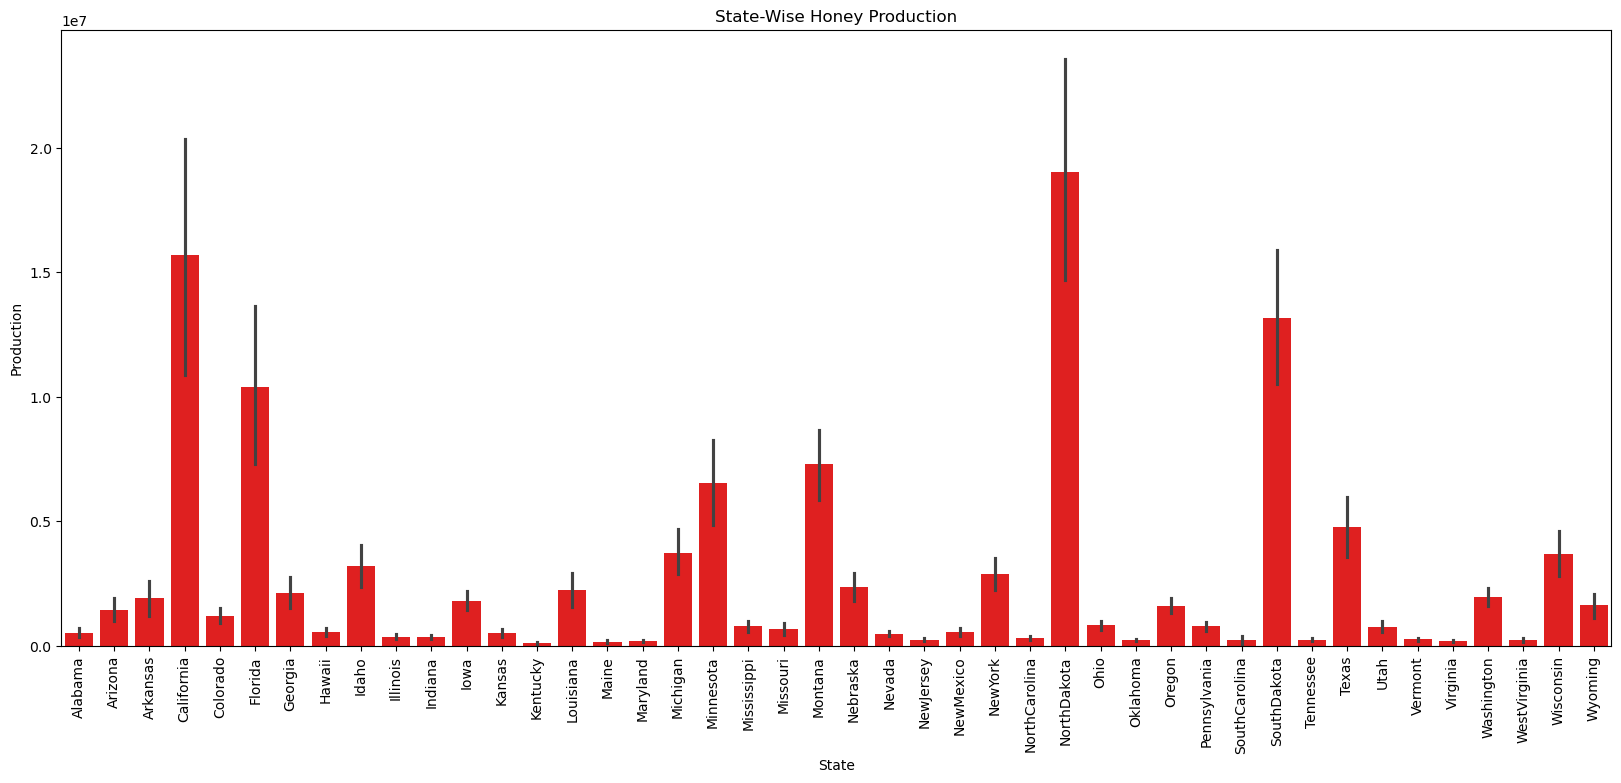

In [75]:
plt.figure(figsize =(20,8))
sns.barplot(x='state',y='production',data=df,color='r')
plt.title('State-Wise Honey Production')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

In [122]:
# top and bottom 5 states v/s Avg_price, production

# grouping states based on production
print("Grouping states based on production : ")
states_production = df.groupby('state')['production'].sum().reset_index()
print(states_production)

Grouping states based on production : 
            state  production
0         Alabama    14467000
1         Arizona    38844000
2        Arkansas    51846000
3      California   423876000
4        Colorado    32660000
5         Florida   280934000
6         Georgia    57426000
7          Hawaii    15420000
8           Idaho    87188000
9        Illinois     9864000
10        Indiana     9686000
11           Iowa    48607000
12         Kansas    14138000
13       Kentucky     3224000
14      Louisiana    60568000
15          Maine     4762000
16       Maryland     1975000
17       Michigan   101063000
18      Minnesota   176581000
19    Mississippi    21235000
20       Missouri    17904000
21        Montana   197173000
22       Nebraska    63655000
23         Nevada     7399000
24      NewJersey     6913000
25      NewMexico    10082000
26        NewYork    78444000
27  NorthCarolina     8909000
28    NorthDakota   513742000
29           Ohio    22485000
30       Oklahoma     2055000
3

In [123]:
Top_5_states_production = states_production.sort_values(by='production',ascending=False).head()

In [124]:
Top_5_states_production

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000


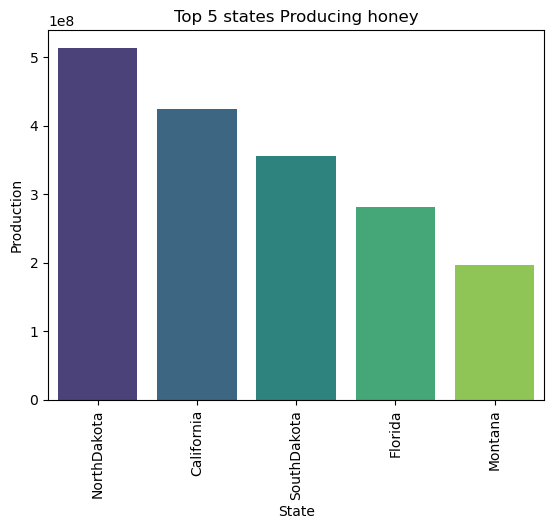

In [125]:
sns.barplot(x='state',y='production',data=Top_5_states_production,palette='viridis',hue='state')
plt.title('Top 5 states Producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

In [126]:
Bottom_5_states_production = states_production.sort_values(by='production',ascending=True).head()

In [127]:
Bottom_5_states_production

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


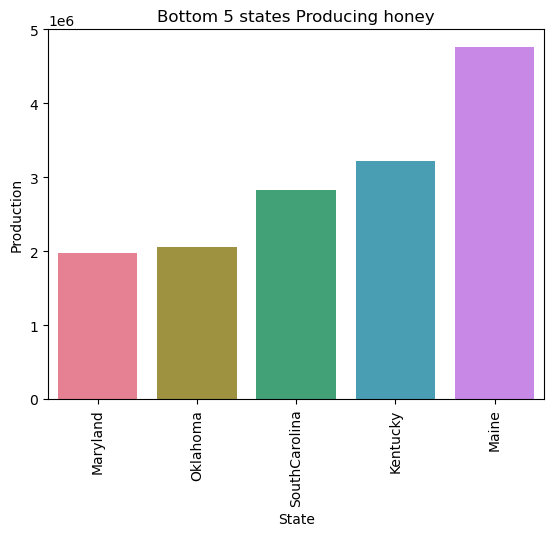

In [128]:
sns.barplot(x='state',y='production',data=Bottom_5_states_production,palette='husl',hue='state')
plt.title('Bottom 5 states Producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

In [174]:
# grouping states based on Avg_price
print("Grouping states based on Avg_price : ")
states_avg_price = df.groupby('state')['average_price'].sum().reset_index()
states_avg_price.head()

Grouping states based on Avg_price : 


,state,average_price
0,Alabama,4057.61
1,Arizona,2978.77
2,Arkansas,2870.45
3,California,2954.06
4,Colorado,3200.56


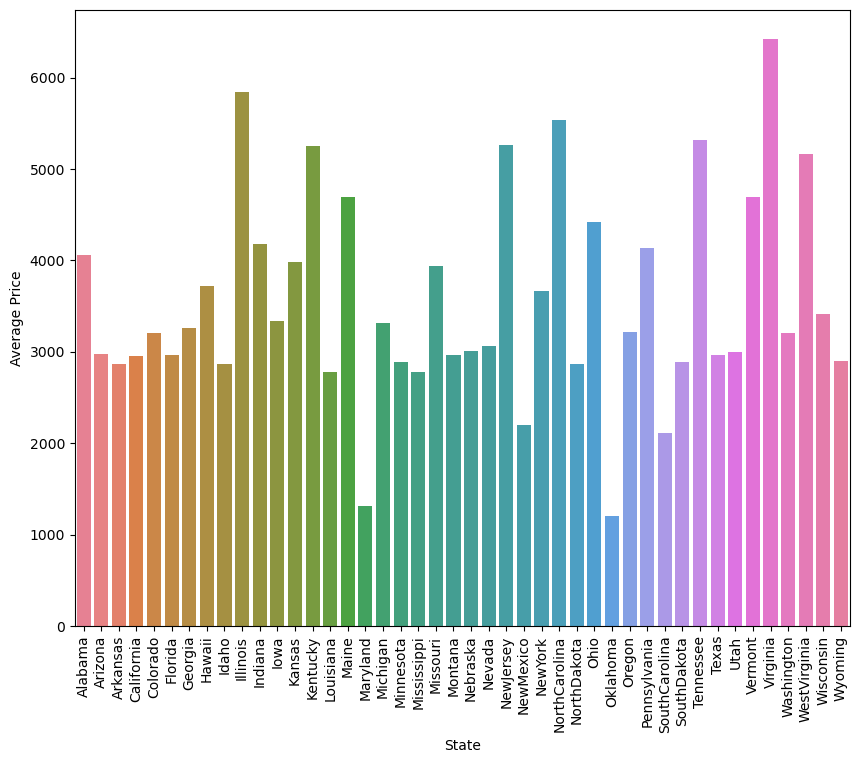

In [175]:
plt.figure(figsize=(10,8))
sns.barplot(x='state',y='average_price',data=states_avg_price,hue='state',palette='husl')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [176]:
Top_5_Avg = states_avg_price.sort_values(by='average_price',ascending=False).head()
Top_5_Avg

,state,average_price
39,Virginia,6419.69
9,Illinois,5842.43
27,NorthCarolina,5540.21
35,Tennessee,5318.06
24,NewJersey,5262.74


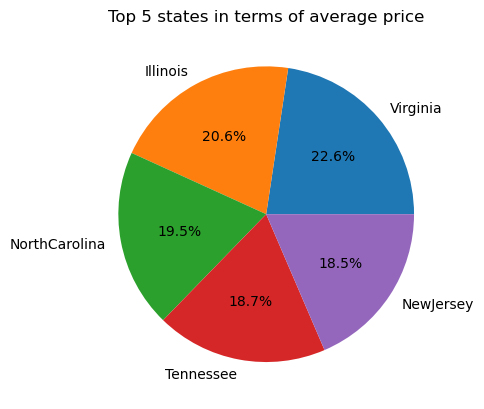

In [177]:
plt.pie(x='average_price',labels='state',autopct='%1.1f%%',data=Top_5_Avg)
plt.title('Top 5 states in terms of average price')
plt.show()

In [178]:
Bottom_5_Avg = states_avg_price.sort_values(by='average_price',ascending=True).head()
Bottom_5_Avg

,state,average_price
30,Oklahoma,1203.00
16,Maryland,1310.00
33,SouthCarolina,2111.96
25,NewMexico,2197.00
19,Mississippi,2776.70


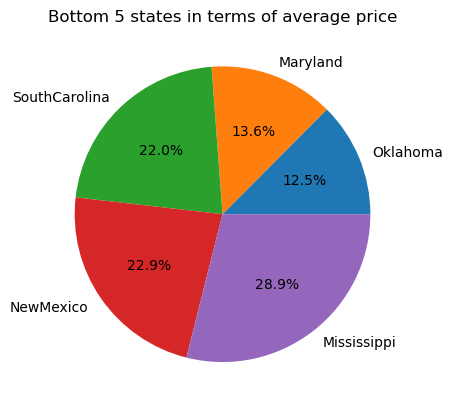

In [179]:
plt.pie(x='average_price',labels='state',autopct='%1.1f%%',data=Bottom_5_Avg)
plt.title('Bottom 5 states in terms of average price')
plt.show()

In [180]:
year_avg_price = df.groupby('year')['average_price'].sum().reset_index()

In [181]:
year_avg_price.head()

,year,average_price
0,1995,3293.0
1,1996,4381.0
2,1997,3927.0
3,1998,3600.0
4,1999,3454.0


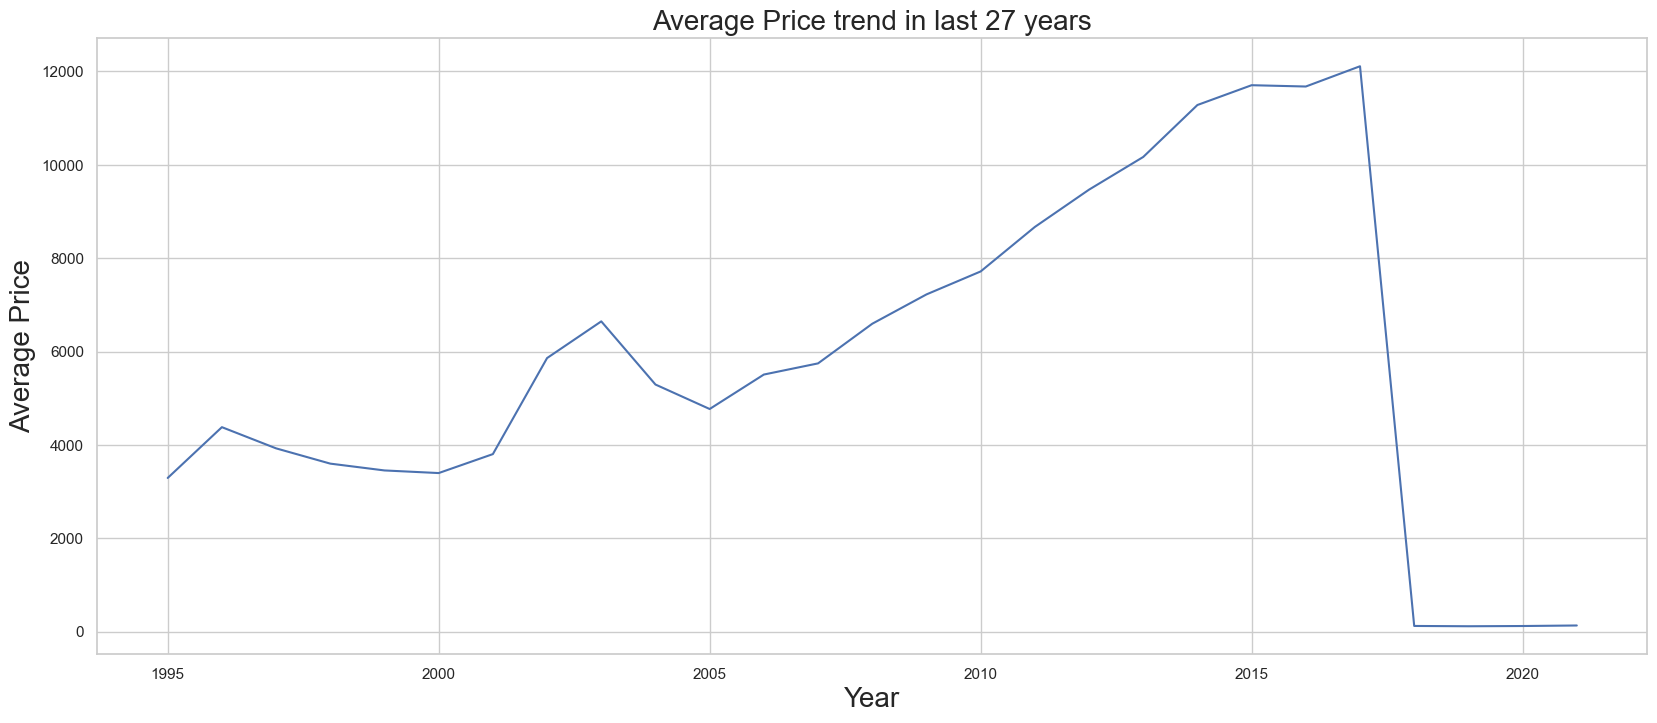

In [190]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.lineplot(x='year',y='average_price', data=year_avg_price)
plt.title('Average Price trend in last 27 years',fontsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

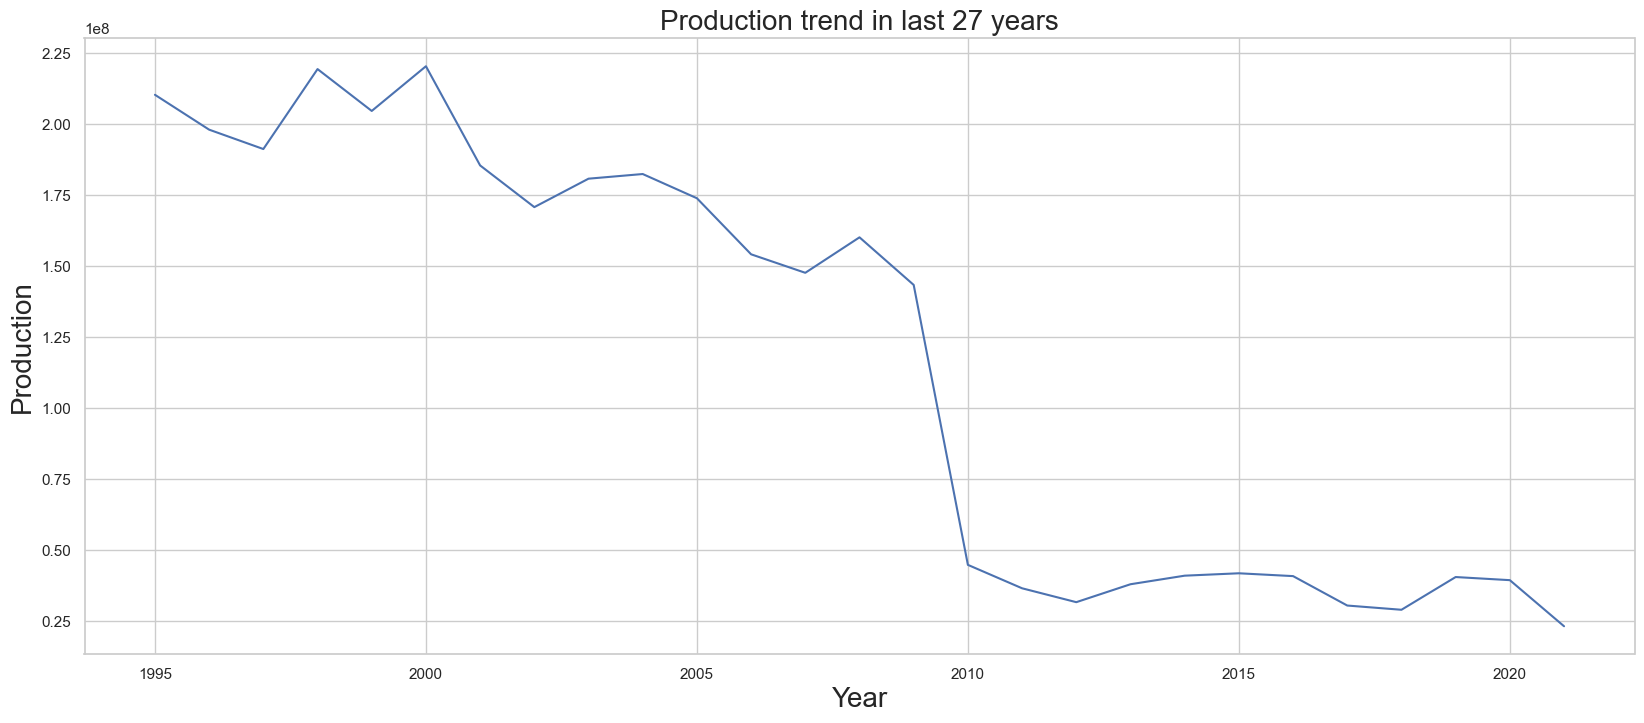

In [192]:
year_prod = df.groupby('year')['production'].sum().reset_index()
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.lineplot(x='year',y='production', data=year_prod)
plt.title('Production trend in last 27 years',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.show()

**1) Which states are rarely contributing to honey production for the last 27 years?**

In [194]:
contr = df.groupby('state')['production'].sum().reset_index()
contr.head()

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000


In [197]:
rarely_contr = contr.sort_values(by = 'production',ascending=True).head()
rarely_contr

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


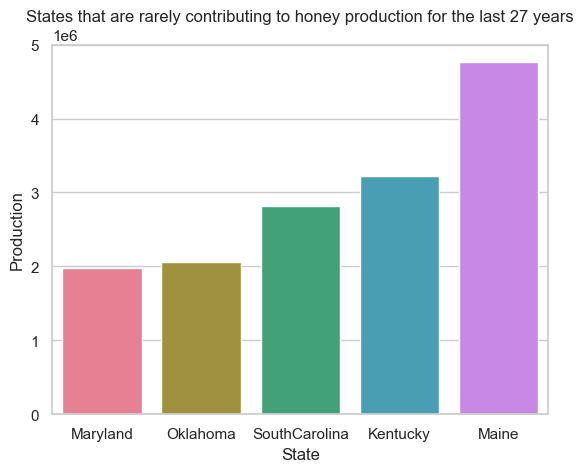

In [203]:
sns.barplot(x='state',y='production',data=rarely_contr,palette='husl',hue='state')
plt.title('States that are rarely contributing to honey production for the last 27 years')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**2) Which are the top 5 Honey producing states in the US ?**

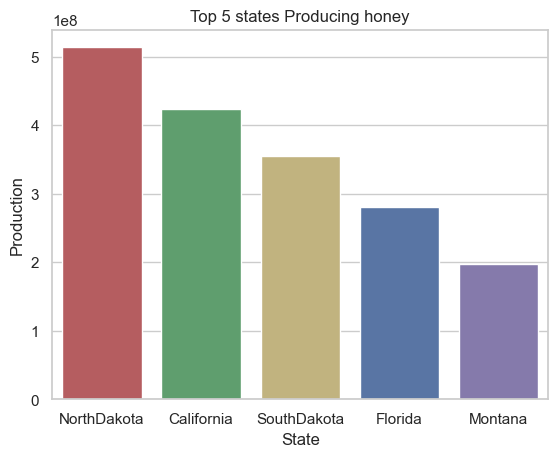

In [209]:
sns.barplot(x='state',y='production',data=Top_5_states_production,palette=['r','g','y','b','m'],hue='state')
plt.title('Top 5 states Producing honey')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

**3) What is the Change in mean Average price of Honey from 1995 to 2021?**

In [220]:
mean_avg= df.groupby('year')['average_price'].mean().reset_index()
mean_avg

,year,average_price
0,1995,74.840909
1,1996,99.568182
2,1997,91.325581
3,1998,83.720930
4,1999,80.325581
5,2000,79.023256
6,2001,88.465116
7,2002,133.204545
8,2003,151.068182
9,2004,132.350000


In [234]:
change_mean = mean_avg.loc[0,'average_price'] - mean_avg.loc[26,'average_price']
change_mean1 = mean_avg.iloc[0,1] - mean_avg.iloc[26,1]

In [236]:
print(change_mean1)
print(change_mean)

71.5066590909091
71.5066590909091


**4) Which was the year when production of Honey in wholeUS was the highest?**

In [240]:
highest_prod = df.groupby('year')['production'].sum().reset_index()

In [244]:
highest_prod.sort_values(by = 'production',ascending=False).head(1)

,year,production
5,2000,220320000


**5) From the above inference we get the production was highest in the year 2000, now let
infer which state was having highest contribution in that year**

In [251]:
highest_contr = df.groupby(['state','year'])['production'].sum().reset_index()
state_2000 = highest_contr.loc[(highest_contr['year']==2000)]

In [252]:
state_2000.sort_values(by = 'production',ascending=False).head(1)

,state,year,production
721,NorthDakota,2000,33350000


**6) Which states have the highest no. of colonies in the year 2000?**

In [321]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [322]:
highest_colony = df.groupby(['state','year'])['colonies_number'].sum().reset_index()

In [323]:
colony_2000 = highest_colony.loc[(highest_colony['year']==2000)]
colony_2000.head()

,state,year,colonies_number
5,Alabama,2000,16000
32,Arizona,2000,40000
59,Arkansas,2000,55000
86,California,2000,440000
113,Colorado,2000,29000


In [324]:
colony_2000.sort_values(by = 'colonies_number',ascending=False).head(1)

,state,year,colonies_number
86,California,2000,440000


In [325]:
state_2000_colony=highest_colony.loc[(highest_colony['year']==2000)]
state_2000_colony.head()

,state,year,colonies_number
5,Alabama,2000,16000
32,Arizona,2000,40000
59,Arkansas,2000,55000
86,California,2000,440000
113,Colorado,2000,29000


In [326]:
result=state_2000_colony.loc[state_2000_colony['colonies_number'].idxmax()]
result

state              California
year                     2000
colonies_number        440000
Name: 86, dtype: object